# Assignment 2

## a) Perform PCA to reduce the number of independent variables - 

In [1]:
import matplotlib.pyplot as plt #this library used for ploting the  diagram
import numpy as np               # numpy is used to creating arrays
import pandas as pd  #panda to read the data set
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer() # so , i here import a particular library called as Breast_cancer from Sklearn
bc_data=bc.data                         #i.e. already present inside the sklearn.datasets

In [3]:
bc.keys()  

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
breast_cancer = pd.DataFrame(bc['data'] 
                   ,columns=bc['feature_names'])  # here i create a dataframe where all my data , my column name
features = bc.feature_names                      # should be the column of feature name.

In [5]:
breast_cancer.head(5)  #so , here you can se there is 30 features  

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### now by using PCA , we try to reduce this 30 dimension into 2 dimension

In [6]:
from sklearn.preprocessing import StandardScaler  #now we need to  rescale all these values in same unit 
                                     # so that we need to use the liberary called as standard scaler

In [7]:
x = breast_cancer.loc[:,features].values                      
x = StandardScaler().fit_transform(x)       # as soon as i applied transform ,       
                                        # all my values will get convert into same scale value.
x.shape                     # to check the shape of our scaled data , we use x.shape

(569, 30)

In [8]:
from sklearn.decomposition import PCA 

In [9]:
pca = PCA(n_components=2)    # here i specify 2 because , i wanted to convert my 30 features into 2 features
pcd = pca.fit_transform(x)   # now these 30 feature are successfully converted into 2 features
pcd.shape                # to check shape of our data after perform PCA

(569, 2)

### Now, we plot these 2 dimensions

In [10]:
bc_d=pd.DataFrame(data = pcd 
                   , columns = ['principal_component_1','principal_component_2'])

In [11]:
bc_d.head()

,principal_component_1,principal_component_2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


Text(0, 0.5, 'Second principle component')

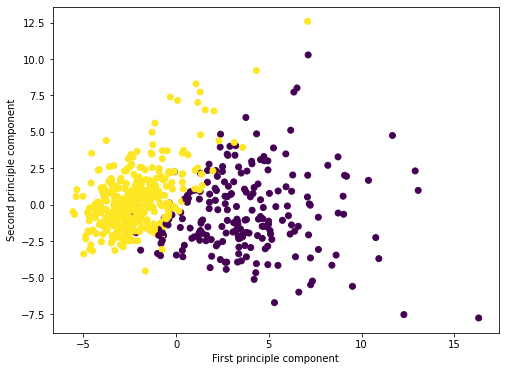

In [12]:
plt.figure(figsize=(8,6))                            
plt.scatter(pcd[:,0],pcd[:,1],c=bc['target'] )
plt.xlabel('First principle component')
plt.ylabel('Second principle component')   # now all these data is converted into new dimension.

# b) On the dataset with reduced dimension, 

## i) Perform a scatter plot (in two or three dimensions), and do cluster analysis

In [13]:
from sklearn.cluster import KMeans #import kmeans to do cluster analysis

In [14]:
km = KMeans(n_clusters=2)      # for create Kmeans objects
y_predicted = km.fit_predict(bc_d[['principal_component_1','principal_component_2']])    
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [15]:
bc_d['cluster'] = y_predicted
bc_d.tail(15)

,principal_component_1,principal_component_2,cluster
554,-2.153904,-0.830069,1
555,-2.055084,1.616459,1
556,-3.877290,1.084255,1
557,-4.063862,0.122168,1
558,-0.098667,-0.213560,1
559,-1.089376,1.292848,1
560,-0.481771,-0.178020,1
561,-4.870310,-2.131106,1
562,5.917613,3.482637,0
563,8.741338,-0.573855,0


In [16]:
km.cluster_centers_

array([[ 4.35883027,  0.04297744],
       [-2.20247773, -0.02171612]])

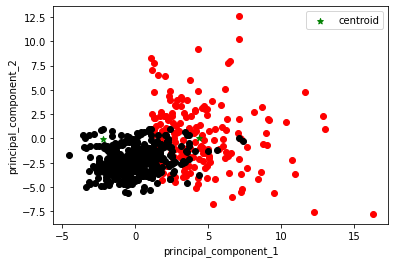

In [17]:
bc_d1 = bc_d[bc_d.cluster==0]
bc_d2 = bc_d[bc_d.cluster==1]

plt.scatter(bc_d1.principal_component_1,bc_d1['principal_component_2'],color='red')
plt.scatter(bc_d2.principal_component_2,bc_d2['principal_component_1'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='green',marker='*',label='centroid' )
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.legend()

## ii) Choose any one variable as dependent and the rest being independent and perform linear regression analysis

### Here my independent variable is  principal_component_1 and dependent variable is principal_component_2

In [18]:
bc_d.to_csv("reduced_data.csv" , index = False) # here i save reduced data to my machine as reduced_data.csv
from sklearn import linear_model      
import matplotlib.pyplot as plt      
rc_d = pd.read_csv("reduced_data.csv")     # here i load reduced.csv into pandas dataframe
pc_d = rc_d.head(10)
pc_d

,principal_component_1,principal_component_2,cluster
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
5,2.380247,3.949929,0
6,2.238883,-2.690031,0
7,2.143299,2.340244,0
8,3.174924,3.391813,0
9,6.351747,7.727174,0


here , i plot a scatterplot of only 10 rows of reduced data to just get an idea  on distribution of my data points

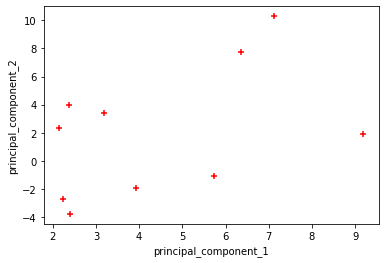

In [19]:
%matplotlib inline  
plt.xlabel('principal_component_1')   # here i setting my x label and y label       
plt.ylabel('principal_component_2')
plt.scatter(pc_d.principal_component_1 , pc_d.principal_component_2 , color ='red' , marker = '+')

In [20]:
reg = linear_model.LinearRegression()  #here i create  object for linear regression
reg.fit(pc_d[['principal_component_1']], pc_d.principal_component_2)   # here i training  linear regression model using the available datapoints

LinearRegression()

after executing this line sucessfully , means now our linear regression model is ready to predict the values

In [21]:
reg.predict(np.array([4]).reshape(1, 1)) #here i predict the value of principal_component_2 from principal_component_1

array([1.62470757])

it shows visual representation of my linear regression here .

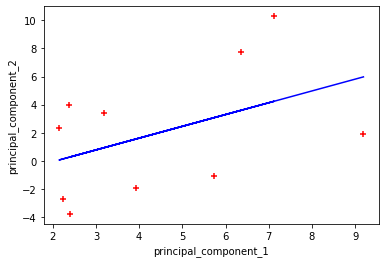

In [22]:
%matplotlib inline
plt.xlabel('principal_component_1' , fontsize = 10)
plt.ylabel('principal_component_2' , fontsize = 10)
plt.scatter(pc_d.principal_component_1 , pc_d.principal_component_2 , color ='red' , marker = '+')   
plt.plot(pc_d.principal_component_1 , reg.predict(pc_d[['principal_component_1']]), color = 'blue') 

In [23]:
d = pd.read_csv("Book1.csv")   # here i create another csv file to predict the values for principle component 2
d

,principal_component_1
0,9.192837
1,2.387802
2,5.733896
3,7.122953
4,3.935302
5,2.380247
6,2.238883
7,2.143299
8,3.174924


In [24]:
p = reg.predict(d)   #here i use regression model to predict the values for principal_component_2
p

array([5.97423746, 0.27432733, 3.07702236, 4.24049904, 1.57051646,
       0.26799954, 0.14959292, 0.06953091, 0.93362261])

In [25]:
d['principal_component_2'] = p  # here i create new column in my dataframe name as principal_component_2

In [26]:
d  # so you can see here , we comeup with list of predictions.

,principal_component_1,principal_component_2
0,9.192837,5.974237
1,2.387802,0.274327
2,5.733896,3.077022
3,7.122953,4.240499
4,3.935302,1.570516
5,2.380247,0.268000
6,2.238883,0.149593
7,2.143299,0.069531
8,3.174924,0.933623
